<a href="https://colab.research.google.com/github/rikokir/BarnBridge-Barn/blob/master/F1_history.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Bibliotecas/ Library
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
import requests
import urllib.request

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime as dt

In [10]:
# importando datasets/ import datasets
circuits = pd.read_csv('/content/circuits.csv')
constructor_results = pd.read_csv('/content/constructor_results.csv')
constructor_standings = pd.read_csv('/content/constructor_standings.csv')
constructors = pd.read_csv('/content/constructors.csv')
driver_standings = pd.read_csv('/content/driver_standings.csv')
drivers = pd.read_csv('/content/drivers.csv') 
lap_times = pd.read_csv('/content/lap_times.csv')
pit_stops = pd.read_csv('/content/pit_stops.csv')
qualifying = pd.read_csv('/content/qualifying.csv')
races = pd.read_csv('/content/races.csv') 
results = pd.read_csv('/content/results.csv')
seasons = pd.read_csv('/content/seasons.csv') 
sprint_results = pd.read_csv('/content/sprint_results.csv') 
status = pd.read_csv('/content/status.csv') 

In [11]:
display('circuits', circuits.head(3), circuits.shape)
display('constructor_results', constructor_results.head(3),constructor_results.shape)
display('constructor_standings', constructor_standings.head(3), constructor_standings.shape)
display('constructors', constructors.head(3), constructors.shape)
display('driver_standings', driver_standings.head(3), driver_standings.shape)
display('drivers', drivers.head(3), drivers.shape)
display('lap_times', lap_times.head(3), lap_times.shape)
display('pit_stops', pit_stops.head(3), pit_stops.shape)
display('qualifying', qualifying.head(3),qualifying.shape)
display('races', races.head(3), races.shape)
display('results', results.head(3), results.shape)
display('seasons', seasons.head(3), seasons.shape)
display('sprint_results', sprint_results.head(3), sprint_results.shape)
display('status', status.head(3), status.shape)

'circuits'

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.7380,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.5106,7,http://en.wikipedia.org/wiki/Bahrain_Internati...


(76, 9)

'constructor_results'

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N


(12170, 5)

'constructor_standings'

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0


(12931, 7)

'constructors'

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...


(211, 5)

'driver_standings'

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0


(33882, 7)

'drivers'

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg


(855, 9)

'lap_times'

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713


(538121, 6)

'pit_stops'

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426


(9634, 7)

'qualifying'

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079


(9575, 9)

'races'

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


(1079, 18)

'results'

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1


(25840, 18)

'seasons'

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...


(73, 2)

'sprint_results'

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1


(120, 16)

'status'

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident


(139, 2)

AttributeError: ignored

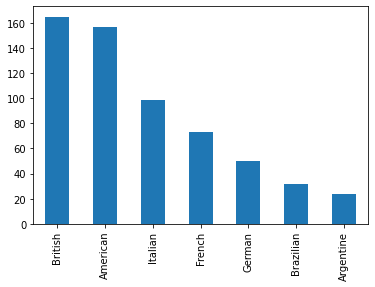

In [13]:
ax = drivers.nationality.value_counts().head(7).plot.bar()
ax.bar_label(ax.containers[0])
plt.yticks([], [])
plt.title("Nacionalidade dos pilotos/ Driver's nationality")
plt.show()

In [14]:
drivers_br = drivers.query('nationality=="Brazilian"')[['driverId','surname','url']]
name_driv_br = []
name_driv_br = [i.replace('http://en.wikipedia.org/wiki/', '').replace('_', ' ') for i in list(drivers_br.url)]
drivers_br['real_name'] = name_driv_br
drivers_br.iloc[4,3] = 'Antonio Pizzonia'
drivers_br.iloc[14,3] = 'Mauricio Gugelmin'
drivers_br.iloc[24,3] = "Fritz d'Orey"
drivers_br = drivers_br.reset_index(drop=True)
drivers_br

,driverId,surname,url,real_name
0,12,Piquet Jr.,"http://en.wikipedia.org/wiki/Nelson_Piquet,_Jr.","Nelson Piquet, Jr."
1,13,Massa,http://en.wikipedia.org/wiki/Felipe_Massa,Felipe Massa
2,22,Barrichello,http://en.wikipedia.org/wiki/Rubens_Barrichello,Rubens Barrichello
3,41,Zonta,http://en.wikipedia.org/wiki/Ricardo_Zonta,Ricardo Zonta
4,42,Pizzonia,http://en.wikipedia.org/wiki/Ant%C3%B4nio_Pizz...,Antonio Pizzonia
5,43,da Matta,http://en.wikipedia.org/wiki/Cristiano_da_Matta,Cristiano da Matta
6,54,Burti,http://en.wikipedia.org/wiki/Luciano_Burti,Luciano Burti
7,58,Marques,http://en.wikipedia.org/wiki/Tarso_Marques,Tarso Marques
8,59,Bernoldi,http://en.wikipedia.org/wiki/Enrique_Bernoldi,Enrique Bernoldi
9,64,Diniz,http://en.wikipedia.org/wiki/Pedro_Diniz,Pedro Diniz


In [15]:
drivers_br = drivers.query('nationality=="Brazilian"')[['driverId','surname','url']]
name_driv_br = []
name_driv_br = [i.replace('http://en.wikipedia.org/wiki/', '').replace('_', ' ') for i in list(drivers_br.url)]
drivers_br['real_name'] = name_driv_br
drivers_br.iloc[4,3] = 'Antonio Pizzonia'
drivers_br.iloc[14,3] = 'Mauricio Gugelmin'
drivers_br.iloc[24,3] = "Fritz d'Orey"
drivers_br = drivers_br.reset_index(drop=True)
drivers_br

,driverId,surname,url,real_name
0,12,Piquet Jr.,"http://en.wikipedia.org/wiki/Nelson_Piquet,_Jr.","Nelson Piquet, Jr."
1,13,Massa,http://en.wikipedia.org/wiki/Felipe_Massa,Felipe Massa
2,22,Barrichello,http://en.wikipedia.org/wiki/Rubens_Barrichello,Rubens Barrichello
3,41,Zonta,http://en.wikipedia.org/wiki/Ricardo_Zonta,Ricardo Zonta
4,42,Pizzonia,http://en.wikipedia.org/wiki/Ant%C3%B4nio_Pizz...,Antonio Pizzonia
5,43,da Matta,http://en.wikipedia.org/wiki/Cristiano_da_Matta,Cristiano da Matta
6,54,Burti,http://en.wikipedia.org/wiki/Luciano_Burti,Luciano Burti
7,58,Marques,http://en.wikipedia.org/wiki/Tarso_Marques,Tarso Marques
8,59,Bernoldi,http://en.wikipedia.org/wiki/Enrique_Bernoldi,Enrique Bernoldi
9,64,Diniz,http://en.wikipedia.org/wiki/Pedro_Diniz,Pedro Diniz


In [18]:
driv_laps_br = pd.merge(results, drivers_br, how = 'inner', on = 'driverId')
driv_laps_br.drop(["url", 'positionText', 'grid', ], axis=1, inplace=True)

small_races = races.loc[:, ['raceId', 'circuitId', 'year']]

driv_laps_br = driv_laps_br.merge(small_races, left_on = 'raceId', right_on = 'raceId')
driv_laps_br.head(2)

,resultId,raceId,driverId,constructorId,number,position,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,surname,real_name,circuitId,year
0,12,18,12,4,6,\N,12,0.0,30,\N,\N,20,16,1:31.384,208.907,8,Piquet Jr.,"Nelson Piquet, Jr.",1,2008
1,13,18,13,6,2,\N,13,0.0,29,\N,\N,23,6,1:28.175,216.510,5,Massa,Felipe Massa,1,2008


In [19]:
driv_laps_br.groupby(['year', 'real_name'])['points'].sum()


year  real_name              
1951  Chico Landi                 0.0
1952  Chico Landi                 0.0
      Gino Bianco                 0.0
1953  Chico Landi                 0.0
1955  Hernando da Silva Ramos     0.0
                                 ... 
2015  Felipe Nasr                27.0
2016  Felipe Massa               53.0
      Felipe Nasr                 2.0
2017  Felipe Massa               43.0
2020  Pietro Fittipaldi           0.0
Name: points, Length: 148, dtype: float64

In [20]:
display(driv_laps_br.query('driverId==622')[['resultId', 'raceId', 'driverId', 'constructorId', 'position', 'points', 'laps',
                                   'statusId', 'circuitId', 'year']])

display(constructors.query(('constructorId==105 | constructorId==6')))

,resultId,raceId,driverId,constructorId,position,points,laps,statusId,circuitId,year
1933,18886,784,622,105,4,1.5,92,16,25,1956
1934,19599,815,622,105,\N,0.0,54,6,66,1953
1935,19635,816,622,105,\N,0.0,18,5,14,1953
1936,19806,823,622,105,9,0.0,83,17,39,1952
1938,19823,824,622,105,8,0.0,76,14,14,1952
1940,20002,831,622,6,\N,0.0,0,7,14,1951


,constructorId,constructorRef,name,nationality,url
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
103,105,maserati,Maserati,Italian,http://en.wikipedia.org/wiki/Maserati


In [21]:
display(driv_laps_br.query("position=='1'").sort_values('year').head(1))
display(races.query('raceId==654'))

,resultId,raceId,driverId,constructorId,number,position,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,surname,real_name,circuitId,year
1927,16158,654,224,32,24,1,1,9.0,108,1:57:32.79,7052790,\N,\N,\N,\N,1,Fittipaldi,Emerson Fittipaldi,46,1970


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
653,654,1970,12,46,United States Grand Prix,1970-10-04,\N,http://en.wikipedia.org/wiki/1970_United_State...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [22]:
resul_befor_first_win = driv_laps_br.query("year<1970").sort_values('year')
resul_befor_first_win.head(2)

,resultId,raceId,driverId,constructorId,number,position,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,surname,real_name,circuitId,year
1940,20002,831,622,6,12,\N,20,0.0,0,\N,\N,\N,\N,\N,\N,7,Landi,Chico Landi,14,1951
1949,19753,821,746,105,34,18,18,0.0,77,\N,\N,\N,\N,\N,\N,18,Bianco,Gino Bianco,9,1952


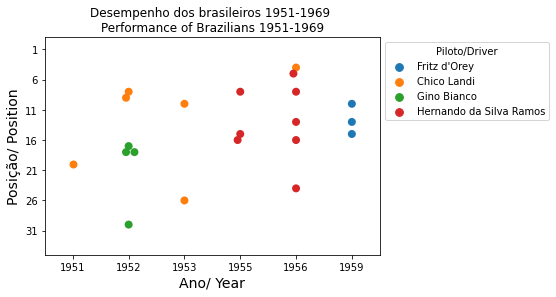

In [23]:
g = sns.swarmplot(x='year', 
                y='positionOrder', data=driv_laps_br.query('year<1970'), 
                hue='real_name',
                palette='tab10', s=8
                   )
plt.ylim(35, -1)
plt.yticks(np.arange(1, 35, step=5))
plt.title("Desempenho dos brasileiros 1951-1969 \nPerformance of Brazilians 1951-1969")
plt.ylabel("Posição/ Position",fontsize=14)
plt.xlabel("Ano/ Year",fontsize=14)
plt.rcParams["figure.figsize"] = (10,6)
g.legend (title='Piloto/Driver',
          bbox_to_anchor = (1, 1))


plt.show(g)

In [25]:
palette = {"Nelson Piquet":"blue", "Emerson Fittipaldi":"black", "Alex Ribeiro":"gray", "Carlos Pace":"crimson", "Ingo Hoffmann":"lime", "Luiz Bueno":"darkorange", "Wilson Fittipaldi":"plum",
          "Roberto Moreno":"olive", "Ayrton Senna":"red", "Mauricio Gugelmin":"green", "Chico Serra":"darkviolet", "Raul Boesel":"tan",
          "Rubens Barrichello":"orange", "Ricardo Zonta":"silver", "Pedro Diniz":"darkslategrey", "Ricardo Rosset":"cornflowerblue", "Tarso Marques":"firebrick", "Christian Fittipaldi":"hotpink",
           "Nelson Piquet, Jr.":"royalblue", "Felipe Massa":"darkgreen", "Antonio Pizzonia":"blueviolet", "Cristiano da Matta":"palegreen", "Enrique Bernoldi":"orangered", "Luciano Burti":"deeppink", 
           "Bruno Senna":"chocolate", "Lucas di Grassi":"orchid", "Felipe Nasr":"slategray", "Pietro Fittipaldi":"chartreuse"}

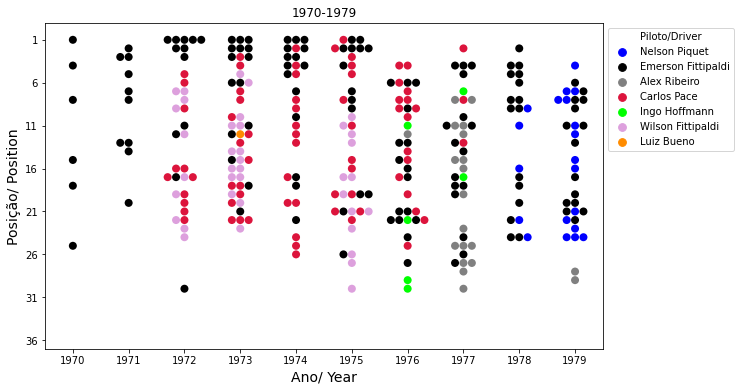

In [26]:
g = sns.swarmplot(x='year', 
                y='positionOrder', data=driv_laps_br.query('year>=1970 & year<1980'), 
                hue='real_name',
                palette=palette, s=8
                   )
plt.ylim(37, -1)
plt.yticks(np.arange(1, 37, step=5))
plt.title("1970-1979")
plt.ylabel("Posição/ Position",fontsize=14)
plt.xlabel("Ano/ Year",fontsize=14)
plt.rcParams["figure.figsize"] = (10,6)
g.legend (title='Piloto/Driver',
          bbox_to_anchor = (1, 1))


plt.show(g)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


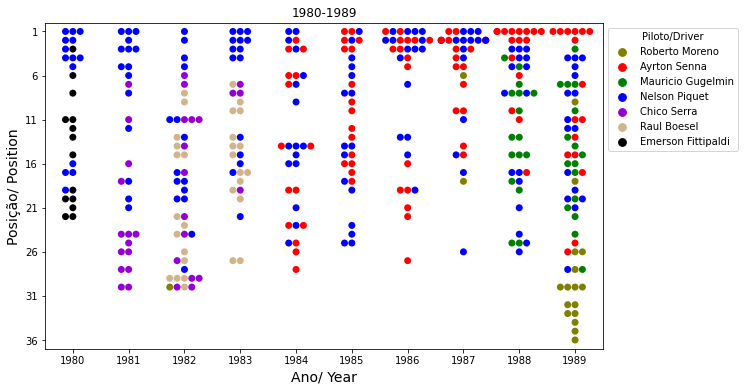

In [27]:
g = sns.swarmplot(x='year', 
                y='positionOrder', data=driv_laps_br.query('year>=1980 & year<1990'), 
                hue='real_name',
                palette=palette, s=7
                   )
plt.ylim(37, 0)
plt.yticks(np.arange(1, 37, step=5))
plt.title("1980-1989")
plt.ylabel("Posição/ Position",fontsize=14)
plt.xlabel("Ano/ Year",fontsize=14)
plt.rcParams["figure.figsize"] = (17,6)
g.legend (title='Piloto/Driver',
          bbox_to_anchor = (1, 1))


plt.show(g)

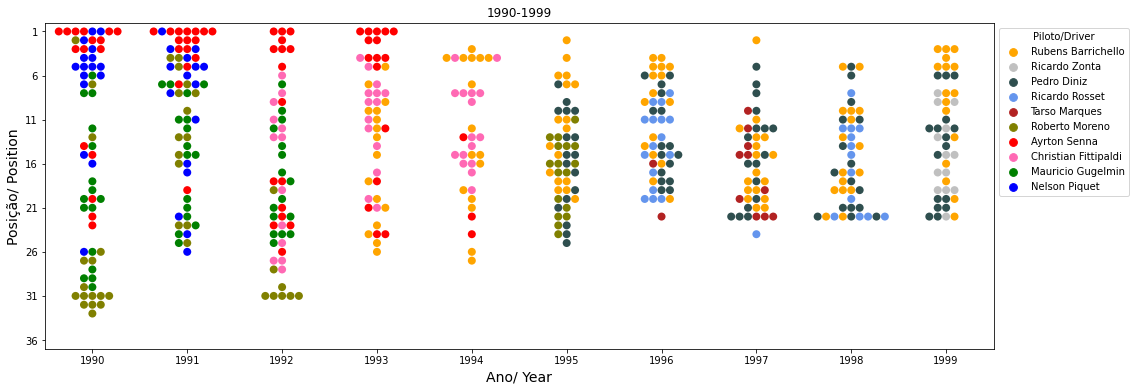

In [29]:
g = sns.swarmplot(x='year', 
                y='positionOrder', data=driv_laps_br.query('year>=1990 & year<2000'), 
                hue='real_name',
                palette=palette, s=8
                   )
plt.ylim(37, 0)
plt.yticks(np.arange(1, 37, step=5))
plt.title("1990-1999")
plt.ylabel("Posição/ Position",fontsize=14)
plt.xlabel("Ano/ Year",fontsize=14)
plt.rcParams["figure.figsize"] = (15,10)
g.legend (title='Piloto/Driver',
          bbox_to_anchor = (1, 1))


plt.show(g)

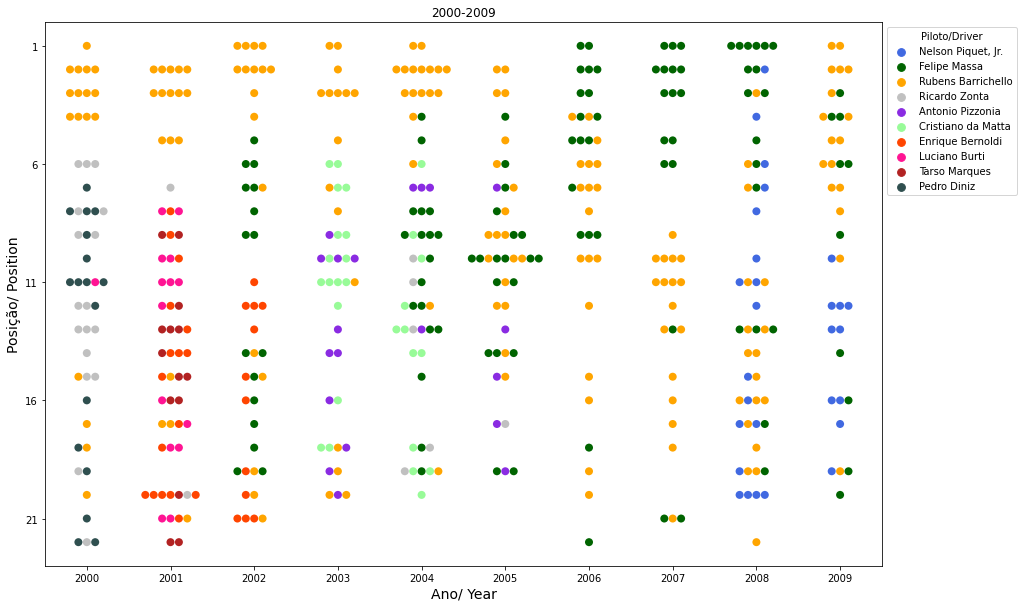

In [30]:
g = sns.swarmplot(x='year', 
                y='positionOrder', data=driv_laps_br.query('year>=2000 & year<2010'), 
                hue='real_name',
                palette=palette, s=8
                   )
plt.ylim(23, 0)
plt.yticks(np.arange(1, 23, step=5))
plt.title("2000-2009")
plt.ylabel("Posição/ Position",fontsize=14)
plt.xlabel("Ano/ Year",fontsize=14)
plt.rcParams["figure.figsize"] = (15,10)
g.legend (title='Piloto/Driver',
          bbox_to_anchor = (1, 1))


plt.show(g)

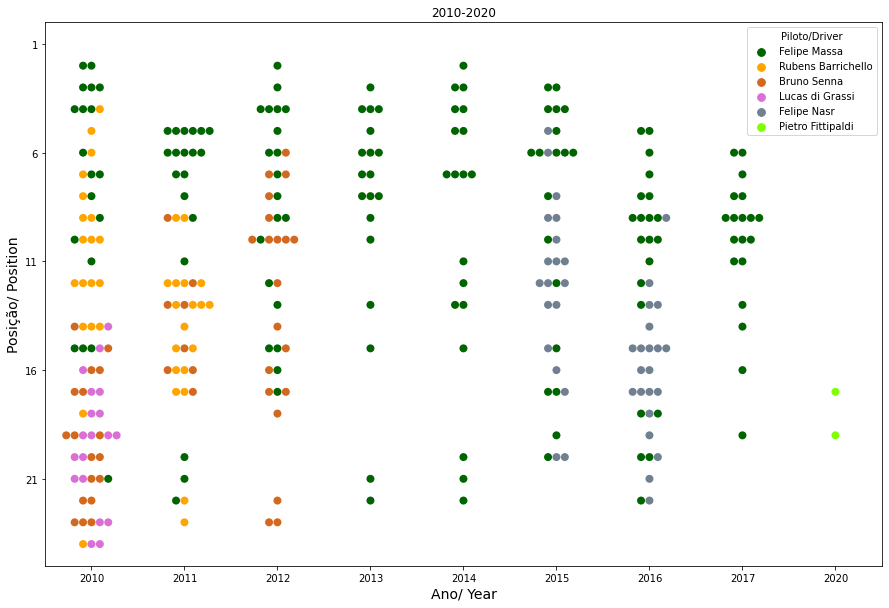

In [31]:
g = sns.swarmplot(x='year', 
                y='positionOrder', data=driv_laps_br.query('year>=2010'), 
                hue='real_name',
                palette=palette, s=8
                   )
plt.ylim(25, 0)
plt.yticks(np.arange(1, 25, step=5))
plt.title("2010-2020")
plt.ylabel("Posição/ Position",fontsize=14)
plt.xlabel("Ano/ Year",fontsize=14)
plt.rcParams["figure.figsize"] = (15,10)
g.legend (title='Piloto/Driver',
          bbox_to_anchor = (1, 1))


plt.show(g)

In [ ]:
bx = driv_laps_br.query('positionOrder==1').groupby('real_name')['positionOrder'].sum().sort_v
alues(ascending=False).plot.bar()
bx.bar_label(bx.containers[0])
bx.set_ylabel("Nº de vitórias/Number of wins",fontsize=14)
bx.set_xlabel("Pilotos/ Drivers",fontsize=14)
plt.ylim(0, 45)
plt.title("Brasileiros vitoriosos/ Victorious Brazilians")
plt.xticks(rotation=90, size=12)
plt.yticks([], [])
plt.show()

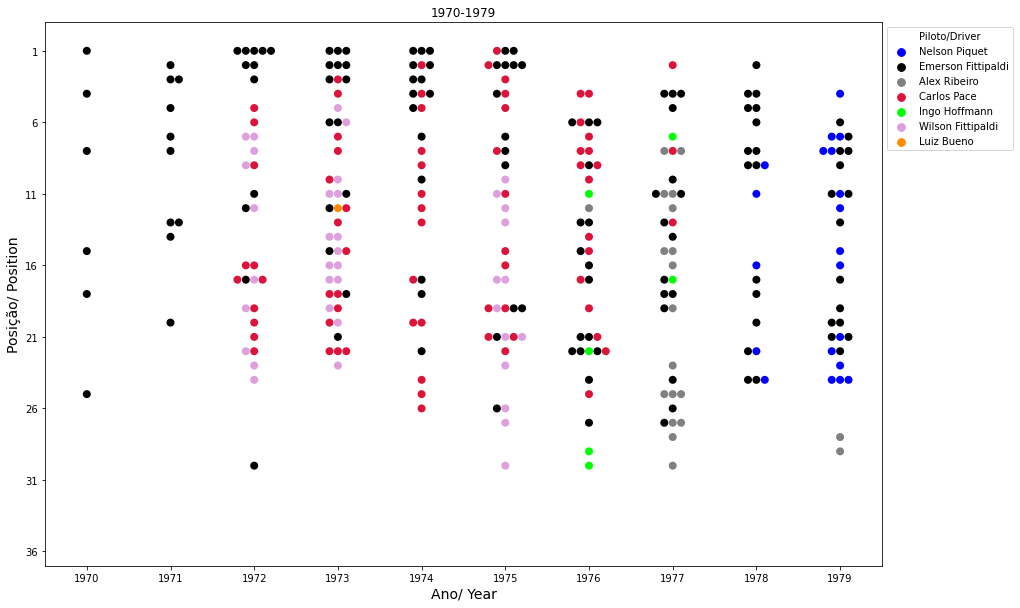

In [35]:
g = sns.swarmplot(x='year', 
                y='positionOrder', data=driv_laps_br.query('year>=1970 & year<1980'), 
                hue='real_name',
                palette=palette, s=8
                   )
plt.ylim(37, -1)
plt.yticks(np.arange(1, 37, step=5))
plt.title("1970-1979")
plt.ylabel("Posição/ Position",fontsize=14)
plt.xlabel("Ano/ Year",fontsize=14)
plt.rcParams["figure.figsize"] = (10,6)
g.legend (title='Piloto/Driver',
          bbox_to_anchor = (1, 1))


plt.show(g)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


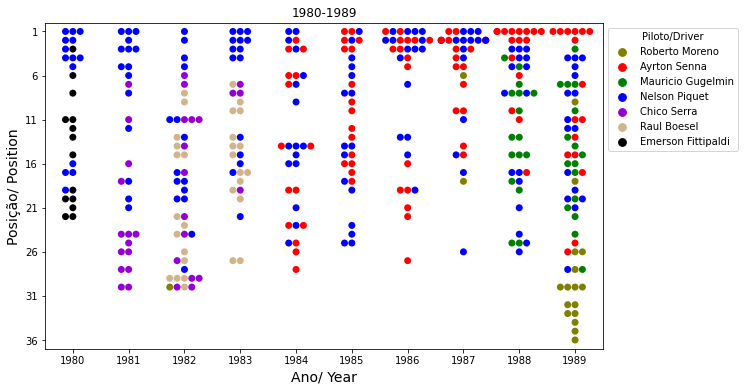

In [36]:
g = sns.swarmplot(x='year', 
                y='positionOrder', data=driv_laps_br.query('year>=1980 & year<1990'), 
                hue='real_name',
                palette=palette, s=7
                   )
plt.ylim(37, 0)
plt.yticks(np.arange(1, 37, step=5))
plt.title("1980-1989")
plt.ylabel("Posição/ Position",fontsize=14)
plt.xlabel("Ano/ Year",fontsize=14)
plt.rcParams["figure.figsize"] = (17,6)
g.legend (title='Piloto/Driver',
          bbox_to_anchor = (1, 1))


plt.show(g)

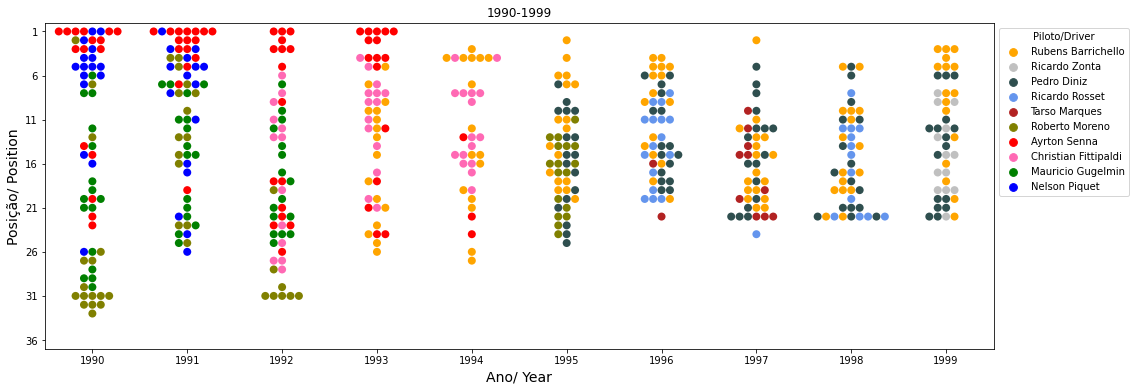

In [37]:
g = sns.swarmplot(x='year', 
                y='positionOrder', data=driv_laps_br.query('year>=1990 & year<2000'), 
                hue='real_name',
                palette=palette, s=8
                   )
plt.ylim(37, 0)
plt.yticks(np.arange(1, 37, step=5))
plt.title("1990-1999")
plt.ylabel("Posição/ Position",fontsize=14)
plt.xlabel("Ano/ Year",fontsize=14)
plt.rcParams["figure.figsize"] = (15,10)
g.legend (title='Piloto/Driver',
          bbox_to_anchor = (1, 1))


plt.show(g)

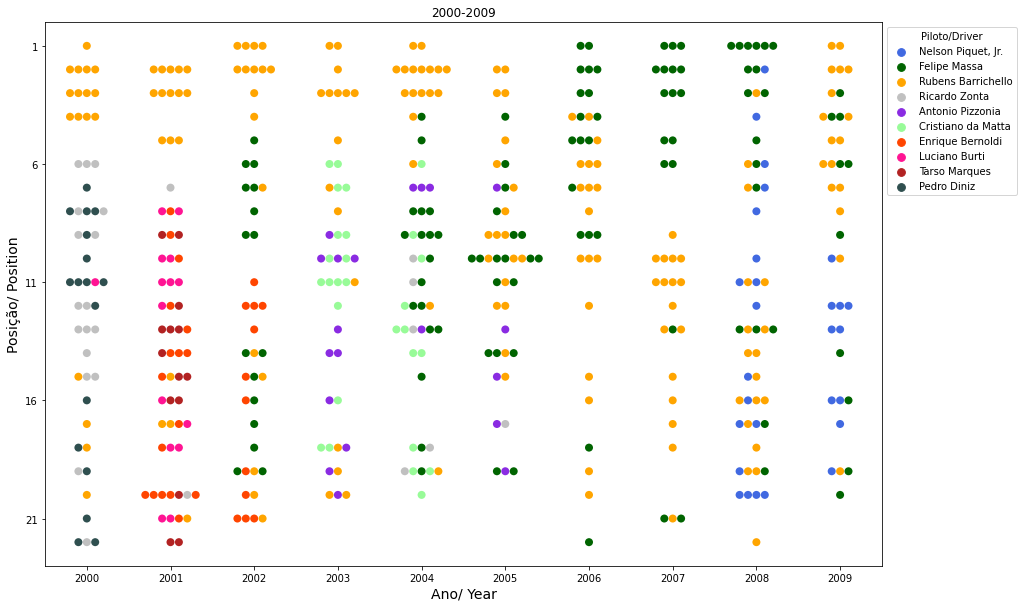

In [38]:
g = sns.swarmplot(x='year', 
                y='positionOrder', data=driv_laps_br.query('year>=2000 & year<2010'), 
                hue='real_name',
                palette=palette, s=8
                   )
plt.ylim(23, 0)
plt.yticks(np.arange(1, 23, step=5))
plt.title("2000-2009")
plt.ylabel("Posição/ Position",fontsize=14)
plt.xlabel("Ano/ Year",fontsize=14)
plt.rcParams["figure.figsize"] = (15,10)
g.legend (title='Piloto/Driver',
          bbox_to_anchor = (1, 1))


plt.show(g)

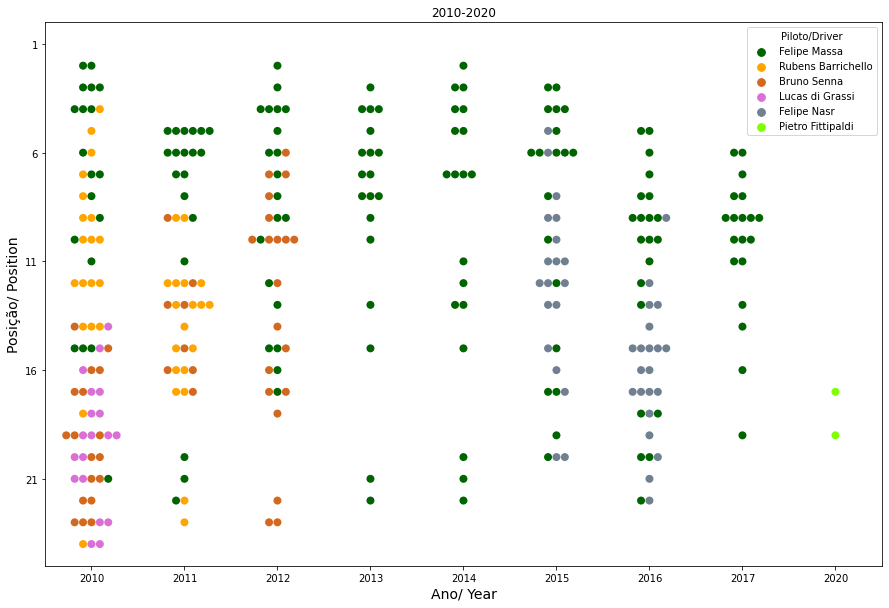

In [39]:
g = sns.swarmplot(x='year', 
                y='positionOrder', data=driv_laps_br.query('year>=2010'), 
                hue='real_name',
                palette=palette, s=8
                   )
plt.ylim(25, 0)
plt.yticks(np.arange(1, 25, step=5))
plt.title("2010-2020")
plt.ylabel("Posição/ Position",fontsize=14)
plt.xlabel("Ano/ Year",fontsize=14)
plt.rcParams["figure.figsize"] = (15,10)
g.legend (title='Piloto/Driver',
          bbox_to_anchor = (1, 1))


plt.show(g)

In [41]:
drivers_world = drivers[['driverId','surname','url', 'nationality']]
name_driv_world = []
name_driv_world = [i.replace('http://en.wikipedia.org/wiki/', '').replace('_', ' ') for i in list(drivers_world.url)]
drivers_world.insert(4,'real_name','')
drivers_world.iloc[:,4] = name_driv_world

driv_laps_world = pd.merge(results, drivers_world, how = 'inner', on = 'driverId')
driv_laps_world.drop(["url", 'positionText', 'grid', ], axis=1, inplace=True)

drivers_world = drivers_world.reset_index(drop=True)
driv_laps_world = driv_laps_world.merge(small_races, left_on = 'raceId', right_on = 'raceId')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [44]:
drivers_engl = drivers.query('nationality=="British"')[['driverId','surname','url']]
name_driv_engl = []
name_driv_engl = [i.replace('http://en.wikipedia.org/wiki/', '').replace('_', ' ') for i in list(drivers_engl.url)]
drivers_engl['real_name'] = name_driv_engl

driv_laps_engl = pd.merge(results, drivers_engl, how = 'inner', on = 'driverId')
driv_laps_engl.drop(["url", 'positionText', 'grid', ], axis=1, inplace=True)


drivers_engl = drivers_engl.reset_index(drop=True)

driv_laps_engl = driv_laps_engl.merge(small_races, left_on = 'raceId', right_on = 'raceId')

AttributeError: ignored

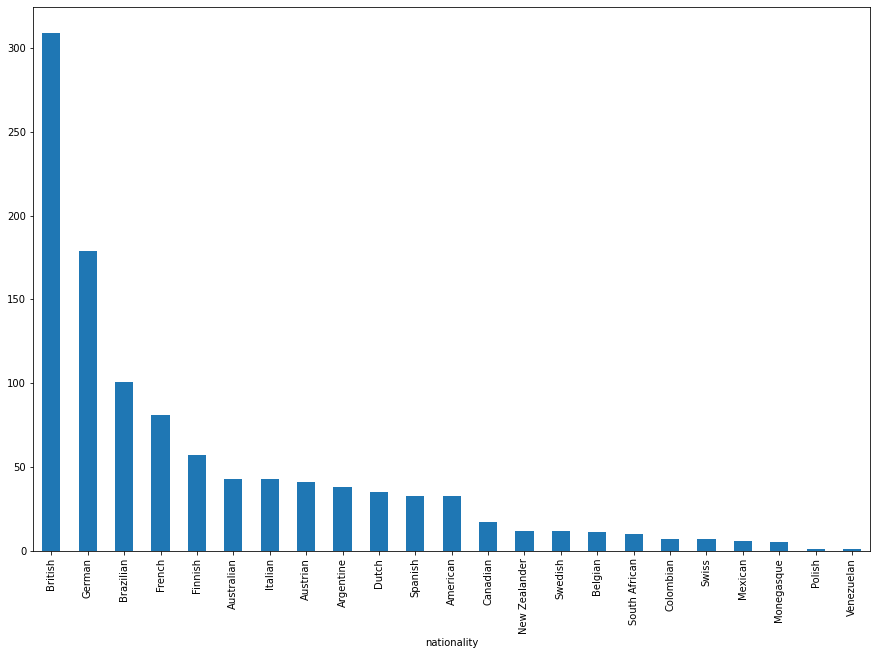

In [43]:
dx = driv_laps_world.query('positionOrder==1').groupby('nationality')['positionOrder']\
                                                .sum().sort_values(ascending=False).plot.bar()
dx.bar_label(dx.containers[0])
dx.set_ylabel("Nº de vitórias/Number of wins",fontsize=14)
dx.set_xlabel("Pilotos/ Drivers",fontsize=14)
plt.ylim(0, 350)
plt.xticks(rotation=90, size=12)
plt.yticks([], [])
plt.show()

In [45]:
wins_br_driv = pd.DataFrame(driv_laps_br.query('positionOrder==1')\
                            .groupby('real_name')['positionOrder'].sum()).reset_index()
wins_br_driv.iloc[:,[0]] = wins_br_driv.real_name + '_br'

wins_engl_driv = pd.DataFrame(driv_laps_engl.query('positionOrder==1').groupby('real_name')['positionOrder'].sum()\
                                        .sort_values(ascending=False).head(6)).reset_index()
wins_engl_driv.iloc[:,[0]] = wins_engl_driv.real_name + '_eng'

top6wins = pd.merge(wins_br_driv, wins_engl_driv, how = 'outer')\
                                        .sort_values('positionOrder', ascending=False).set_index('real_name')

AttributeError: ignored

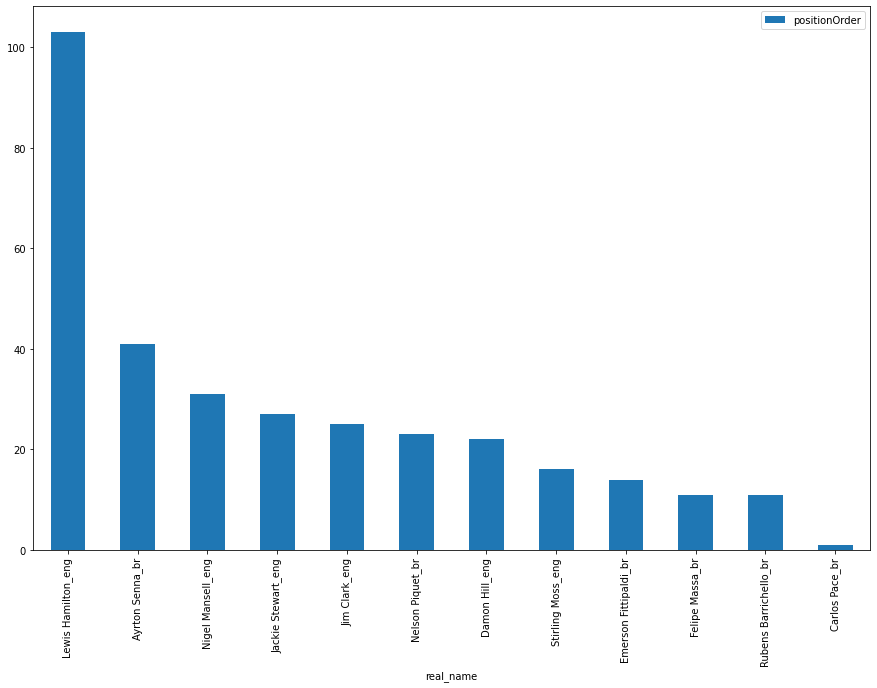

In [46]:
cx = top6wins.plot.bar()
cx.bar_label(cx.containers[0])
cx.set_ylabel("Nº de vitórias/Number of wins",fontsize=14)
cx.set_xlabel("Pilotos/ Drivers",fontsize=14)
plt.ylim(0, 120)
plt.title("British x Brazil")
plt.xticks(rotation=90, size=12)
plt.yticks([], [])
plt.show()